# 02_Adv_PGD

In [1]:
import numpy as np
import random
import torch
torch.cuda.set_device(5)

In [2]:
random_seed = 617
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)
print("Random Seed:",random_seed)

Random Seed: 617


In [3]:
# Import utils from a specific defense
from defenses.base.loader import get_loader
from defenses.base.model import get_model
from defenses.adv_pgd.train import Trainer, get_acc

Loader : Base
Model : Base
Train : Adv PGD


In [4]:
# Set Name
NAME = "02_Adv_PGD"

## 1. Train

In [5]:
# Get Train, Test datasets
train_loader_ns, _ = get_loader(shuffle_train=False)
train_loader, test_loader = get_loader(shuffle_train=True)

# Get Model
model = get_model().cuda()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
WRN-28 is loaded.


In [6]:
train_sets = iter(train_loader_ns).next()
test_sets = iter(test_loader).next()

In [7]:
# Train Model
trainer = Trainer(model, train_sets, test_sets,
                  eps=8/255, alpha=2/255, iters=7, random_start=True)
trainer.train(train_loader, epochs=200,
              save_path="./_models/"+NAME,
              record_type="Epoch", save_type="Epoch")

Train Information:
-Epochs: 200
-Optimizer: SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.1
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)
-Scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7f3af1b4beb8>
-Save Path: ./_models/02_Adv_PGD
-Save Type: Per Epoch
-Record Type: Per Epoch
-Device: cuda
--------------------------------------------------------------------------------------------------------------------------
Epoch   Loss     Acc       Clean(Tr)   FGSM(Tr)   PGD(Tr)   GN(Tr)    Clean(Te)   FGSM(Te)   PGD(Te)   GN(Te)    lr       
1       2.0964   21.6186   35.9375     20.3125    21.0938   35.9375   42.9688     30.4688    30.4688   44.5312   0.1000   
--------------------------------------------------------------------------------------------------------------------------
2       1.9333   27.0393   44.5312     24.2188    24.2188   44.5312   55.4688     32.8125    31.2500   53.1250   0.1000   
----------------------------------

32      1.3093   50.4868   80.4688     55.4688    50.7812   74.2188   79.6875     46.8750    44.5312   75.7812   0.1000   
--------------------------------------------------------------------------------------------------------------------------
33      1.3110   50.7312   80.4688     53.9062    51.5625   75.7812   76.5625     45.3125    39.8438   70.3125   0.1000   
--------------------------------------------------------------------------------------------------------------------------
34      1.3054   50.6991   78.9062     60.1562    56.2500   73.4375   82.0312     44.5312    39.0625   68.7500   0.1000   
--------------------------------------------------------------------------------------------------------------------------
35      1.3022   50.9595   81.2500     57.8125    55.4688   78.1250   76.5625     47.6562    43.7500   72.6562   0.1000   
--------------------------------------------------------------------------------------------------------------------------
36      1.2982  

66      0.9159   64.3650   93.7500     70.3125    64.8438   88.2812   84.3750     58.5938    52.3438   82.0312   0.0200   
--------------------------------------------------------------------------------------------------------------------------
67      0.8874   65.3946   89.8438     73.4375    68.7500   83.5938   84.3750     56.2500    46.8750   83.5938   0.0200   
--------------------------------------------------------------------------------------------------------------------------
68      0.8920   65.4928   91.4062     75.0000    69.5312   84.3750   81.2500     53.1250    46.0938   80.4688   0.0200   
--------------------------------------------------------------------------------------------------------------------------
69      0.8770   65.9756   91.4062     70.3125    60.9375   82.8125   80.4688     52.3438    48.4375   77.3438   0.0200   
--------------------------------------------------------------------------------------------------------------------------
70      0.8660  

100     0.7087   71.1038   97.6562     81.2500    75.0000   90.6250   84.3750     53.9062    46.0938   77.3438   0.0200   
--------------------------------------------------------------------------------------------------------------------------
101     0.7067   71.5585   97.6562     85.9375    75.7812   89.0625   84.3750     50.7812    47.6562   71.0938   0.0200   
--------------------------------------------------------------------------------------------------------------------------
102     0.6957   71.9752   98.4375     82.0312    76.5625   91.4062   88.2812     50.7812    46.8750   81.2500   0.0200   
--------------------------------------------------------------------------------------------------------------------------
103     0.6947   71.7328   98.4375     86.7188    81.2500   92.9688   83.5938     53.1250    44.5312   81.2500   0.0200   
--------------------------------------------------------------------------------------------------------------------------
104     0.6920  

134     0.1922   92.2336   100.0000    100.0000   99.2188   98.4375   88.2812     46.0938    41.4062   83.5938   0.0040   
--------------------------------------------------------------------------------------------------------------------------
135     0.1878   92.3097   100.0000    97.6562    90.6250   96.8750   87.5000     49.2188    41.4062   78.9062   0.0040   
--------------------------------------------------------------------------------------------------------------------------
136     0.1831   92.5781   100.0000    100.0000   96.0938   98.4375   87.5000     45.3125    42.9688   78.1250   0.0040   
--------------------------------------------------------------------------------------------------------------------------
137     0.1764   92.8526   100.0000    99.2188    97.6562   97.6562   86.7188     46.0938    40.6250   78.9062   0.0040   
--------------------------------------------------------------------------------------------------------------------------
138     0.1635  

168     0.0314   99.0585   100.0000    100.0000   98.4375   100.0000  84.3750     48.4375    39.0625   79.6875   0.0008   
--------------------------------------------------------------------------------------------------------------------------
169     0.0339   98.9523   100.0000    100.0000   96.8750   99.2188   86.7188     46.0938    38.2812   81.2500   0.0008   
--------------------------------------------------------------------------------------------------------------------------
170     0.0364   98.8862   100.0000    100.0000   98.4375   98.4375   85.9375     46.8750    38.2812   79.6875   0.0008   
--------------------------------------------------------------------------------------------------------------------------
171     0.0380   98.7941   100.0000    100.0000   98.4375   98.4375   87.5000     48.4375    39.8438   79.6875   0.0008   
--------------------------------------------------------------------------------------------------------------------------
172     0.0322  

In [8]:
trainer.save_all("./_models/"+NAME)

...Saved as csv to ./_models/02_Adv_PGD.csv !


In [9]:
print("Final Test Acc : %2.2f"%get_acc(model, test_loader))

Final Test Acc : 86.97


## 2. Record Visualization

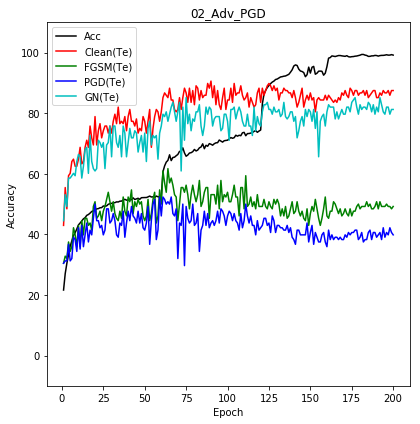

In [11]:
# Plot Train and Test Accuracy
trainer.rm.plot(title=NAME, xlabel="Epoch", ylabel="Accuracy", ylabel_second="Loss",
                x_key='Epoch', y_keys=['Acc', 'Clean(Te)', 'FGSM(Te)', 'PGD(Te)', 'GN(Te)'],
                ylim=(-10, 110), colors=['k', 'r', 'g', 'b', 'c'])

## 3. White Box Attack

In [12]:
import torchattacks
from torchattacks import FGSM, PGD, MultiAttack

In [13]:
model.load_state_dict(torch.load("./_models/"+NAME+".pth"))
model = model.cuda().eval()

### 3.1 FGSM

In [14]:
fgsm = FGSM(model, eps=8/255)
fgsm.set_mode('int')
fgsm.save(data_loader=test_loader,
          file_name="./_datasets/"+NAME+"_FGSM.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 55.52 %
- Save Complete!


### 3.2 PGD

In [15]:
# WB2 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, iters=50)
pgd.set_mode('int')
pgd.save(data_loader=test_loader,
         file_name="./_datasets/"+NAME+"_PGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 42.19 %
- Save Complete!


### 3.3 PGD with 10 Random Restarts

In [16]:
# WB3 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, iters=50, random_start=True)
multi = MultiAttack(model, [pgd]*10)
multi.set_mode('int')
multi.save(data_loader=test_loader,
           file_name="./_datasets/"+NAME+"_RPGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 41.05 %
- Save Complete!


## 4. Black Box Attack

In [17]:
from torch.utils.data import TensorDataset, DataLoader

In [18]:
# BB1 : WRN_28_20
adv_images, adv_labels = torch.load("./_datasets/00_WRN_28_20_PGD.pt")
adv_data = TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

86.04

In [19]:
# BB2 : WRN_40_10
adv_images, adv_labels = torch.load("./_datasets/00_WRN_40_10_PGD.pt")
adv_data = torch.utils.data.TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

86.18